<img src=https://kto-ozvuchival.ru/wp-content/uploads/2017/12/kto-ozvuchivaet-toni-starka-na-russkom-800x500.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Сергей, спасибо за доработки, всё принято👌 Желаю дальнейших успехов🖐

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Сергей, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Привет, Олег! Спасибо за обратную связь, постарался учесть все комментарии при доработке=)</div>

# Проведение A/B тестирования приоритетной гипотезы

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Цель проекта - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. По итогу дать рекомендации.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Проведем приоритизацию гипотез:**

 - Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
 - Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
 - Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Проанализируем, почему так произошло.

### Приоритизация гипотез (ICE)

Прочитаем данные из файла.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis = hypothesis.reset_index()
hypothesis['index'] +=1 
pd.set_option('max_colwidth', 200)
hypothesis.head()

,index,Hypothesis,Reach,Impact,Confidence,Efforts
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Посчитаем фреймворк ICE  и отсортируем по приоритетности. Формула для расчета: $$ICE = \frac{Impact*Confidence}{Efforts}$$

In [3]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее приоритетные гипотезы по расчету ICE - это 9, 1 и 8. При этом расчете не учитывается охват. Посчитаем RICE и сравним.

### Приоритезация гипотез (RICE)

Добавим в таблицу столбец RICE и отфильтруем по приоритетности. Формула для расчета: $$RICE = \frac{Reach*Impact*Confidence}{Efforts}$$

In [4]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При добавлении охвата в расчет наиболее приоритетной становится гипотеза 8, это говорит о том, что данная гипотеза затронет максимальное количество пользователей, максимально повлияет на пользователей, при этом есть высокая уверенность в гипотезе и умеренные затраты на ее осуществление. А вот 9 гипотеза сместилась с первой строчки на пятую, что говорит о маленьком охвате от общей массы пользователей, а точнее 1 (минимальный охват), поэтому цифра та же, что и в расчете ICE. Следует отдать предпочтение для проверки гипотезы 8, т.к. она по приоритетности наиболее перспективна.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Супер, приоритезация выполнена успешно, ты увидел, что параметр <code>REACH</code> может сильно влиять на итоговую позицию</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
<ul>
    <li> гипотезы имеют длинные названия, чтобы они полностью отображались  можно использовать <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html">опции pandas</a>
   <li>в качестве визуализации изменения приоритетов можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>, <a href="https://chart-studio.plotly.com/~pcchang/224/slopegraph-spending-and-academic-performance-by-states-doc/#/">реализация на plotly</a>
    <li> В отчёте есть формулы для расчёта приоритезации, почему бы их не оформить, для этого есть микропакет для вёрстки `LaTex` - <a href="https://www.youtube.com/watch?v=vSc25kdgecg">Использование LaTex в Jupyter Notebook</a>
<br><a href="https://www.overleaf.com/static/latex/learn/free-online-introduction-to-latex-part-1.pdf">LaTex for beginners</a>. Вот так будут выглядеть формулы:👇
</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid orange;" />

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Рекомендации по визуализации очень помогли, со slope graph не до конца разобрался, поискал по открытым источникам, там все как то усложнено, а по твоей ссылке почему-то код не доступен. Отложу на следующие проекты данный вид визуализации, в целом принцип мне понятен.</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Файл /datasets/orders.csv:

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.   
 
 
Файл /datasets/visitors.csv:

 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 
Проведем анализ полученных данных A/B-теста и сделаем выводы.

### Анализ кумулятивной выручки обеих групп

Прочитаем данные из файлов. При прочтении сразу же переведем столбец с датами приведем к формату дат.

In [5]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Типы данных приведены к нужным типам, тип object в столбце группы теста можно заменить на category, но в принципе это никак не повлияет на расчеты, поэтому е вижу смысла заменять тип данных.

In [7]:
orders.duplicated().sum()

0

Дубликатов в данных нет. Проверим корректность распределения пользователей между группами. Если пользователь попал в обе группы, то такие данные следует убрать из данных, т.к. они некорректны.

In [8]:
usersA = orders[orders['group'] == 'A']['visitorId'].unique()
usersB = orders[orders['group'] == 'B']['visitorId'].unique()
error_users = [x for x in usersA if x in usersB]
orders = orders[np.logical_not(orders['visitorId'].isin(error_users))]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Данные очищены, можно перейти к дальнейшим расчетам.

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные прочитаны, создадим таблицу с датами и группами для подсчета кумулятивных данных.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
А как же хотя бы минимальный джентельменский набор: <code>head+info+duplicates</code>, а также в рамках данного проекта проверить корректность распределения пользователей на группы - возможно есть те кто попал в обе группы?!</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Проверил данные и очистил от некорректных транзакций. В выводах поправил полученные цифры.</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберем данные по датам и групам.

In [12]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue'
]
ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Выделим данные по каждой группе.

In [13]:
ordersAggregatedA = ordersAggregated[ordersAggregated['group']=='A']
ordersAggregatedB = ordersAggregated[ordersAggregated['group']=='B']

Построим графики кумулятивных выручек по группам и сравним.

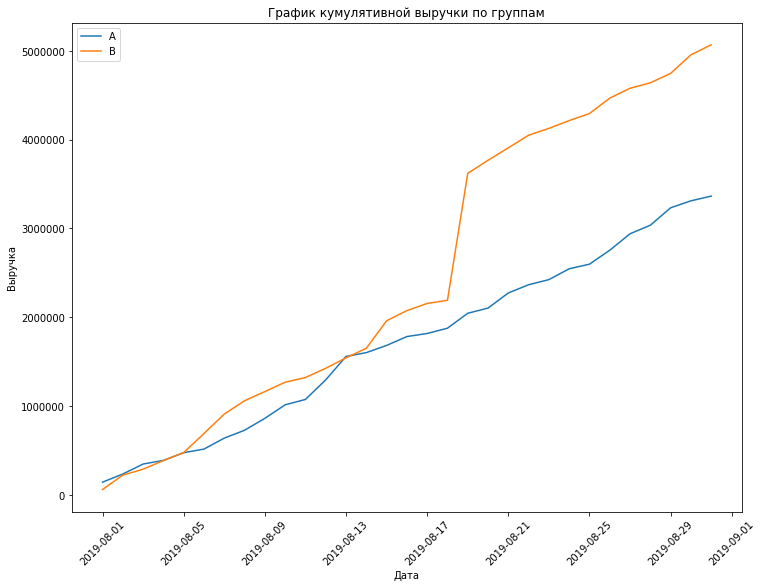

In [14]:
plt.figure(figsize=(12,9))
plt.plot(ordersAggregatedA['date'],ordersAggregatedA['revenue'],label='A')
plt.plot(ordersAggregatedB['date'],ordersAggregatedB['revenue'],label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

Из графика видно, что сперва выручки растут примерно одинаково, но в определенный момент в группе В наблюдается резкий скачок выручки, а затем снова параллельный рост. Это сигнализирует скорее всего о выбросе, что может исказить выводы. Следует проанализировать средний чек.

### Кумулятивный средний чек по группам

Посчитаем средний чек и построим графики.

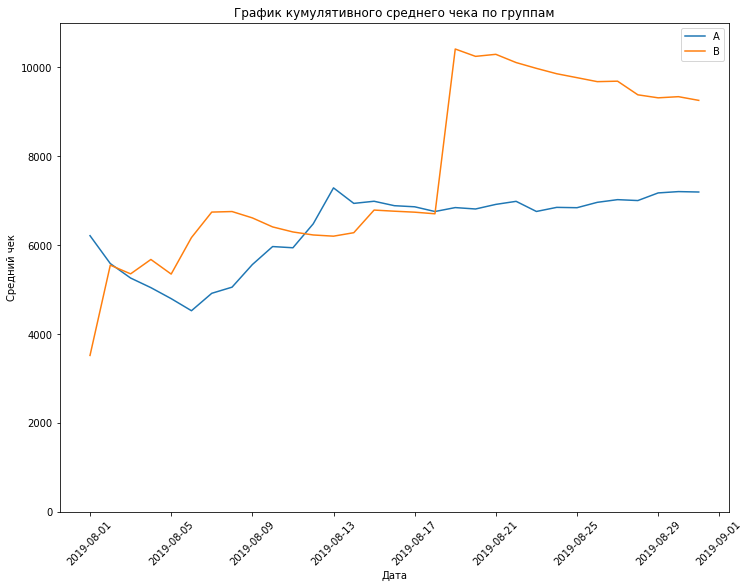

In [15]:
plt.figure(figsize=(12,9))
plt.plot(ordersAggregatedA['date'],ordersAggregatedA['revenue']/ordersAggregatedA['orders'],label='A')
plt.plot(ordersAggregatedB['date'],ordersAggregatedB['revenue']/ordersAggregatedB['orders'],label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.ylim([0,11000])
plt.legend()

Из графика можно сделать вывод, что действительно была большая покупка, которая резко увеличила средний чек группы B. Ближе к концу теста происходит меньше колебаний, график выравнивается. Построим график относительного изменения кумулятивного чека группы B относительно группы А.

### График относительного изменения кумулятивного среднего чека

In [16]:
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


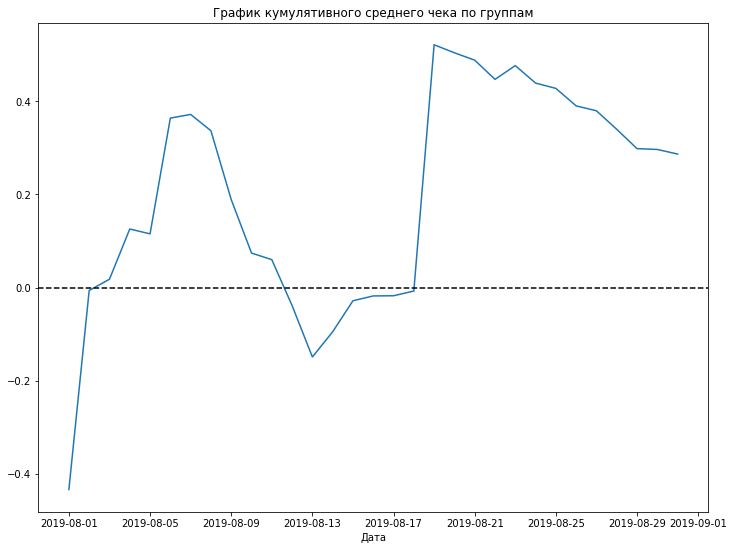

In [17]:
plt.figure(figsize=(12,9))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')

Из графика видно, что есть скачок группы А, из-за чего прирост уходит в отрицательное значение, но в большей части теста присрост среднего чека в положительной динамике. Для понимания, в какой группе выброс - проанализируем конверсию.

### Анализ кумулятивной конверсии

Агрегируем данные по посетителям в кумулятивную таблицу.

In [18]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Объединим

In [19]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Вычислим комулятивную конверсию, создав столбец, разделим на группы и сравним на графике.

In [20]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [21]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

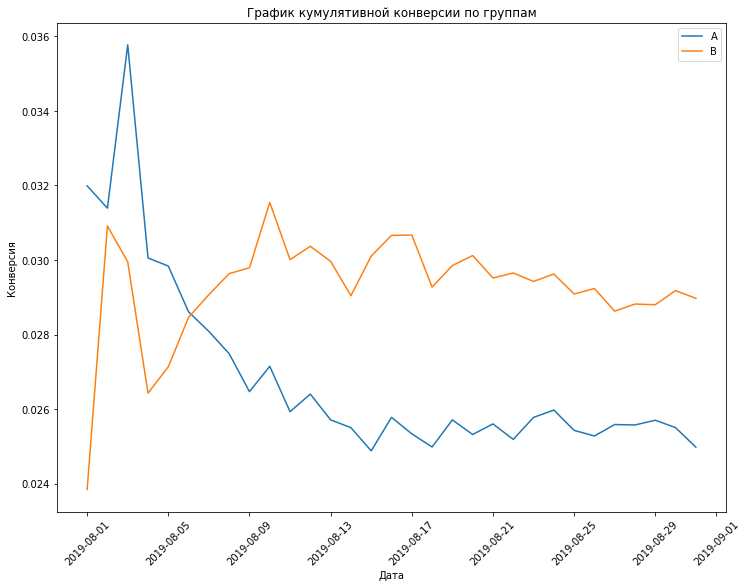

In [22]:
plt.figure(figsize=(12,9))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()

Из графика видно, что сперва конверсия стабилизируется, далее видно, что конверсия группы В (около 3%) стабильно выше группы А (около 2,5%). Проанализируем отосительное изменение кумулятивных конверсий по группам.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Молодец, что отметил стабилизацию кумулятивных конверсий!</div> <br>

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A и проанализируем данные.

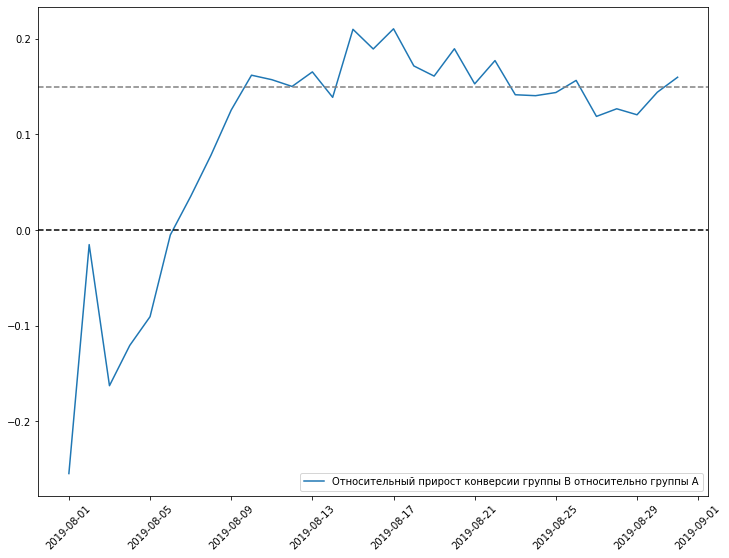

In [23]:
plt.figure(figsize=(12,9))
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']],
           left_on='date',
           right_on='date',
           how='left',
           suffixes=['A','B']))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1,
         label='Относительный прирост конверсии группы B относительно группы А')
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

Из графика видно, что сперва данные стабилизируются, далее фиксируется прирост вокруг значения +15%. Это говорит, что конверсия в групее B выше, чем в групее на 15%, что сигнализирует о успешности гипотезы в части повышения импульса к покупке.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Все шаги раздела кумулятивных метрик выполнены отлично: ты подготовил данные, построил графики, отметил динамику метрик и аномалии не удалось скрыться от твоего взора, молодец, так держать!</div> <br>

### График количества заказов по пользователям

Построим точечный график количества заказов по пользователям и сделаем выводы, предположения.

In [24]:
users_orders = orders.groupby('visitorId', as_index=False).agg({'transactionId':'count', 'group':'max'})
users_orders.head()

,visitorId,transactionId,group
0,5114589,1,B
1,6958315,1,B
2,11685486,1,A
3,39475350,1,B
4,47206413,1,B


In [25]:
users_ordersA = users_orders[users_orders['group']=='A']
users_ordersB = users_orders[users_orders['group']=='B']

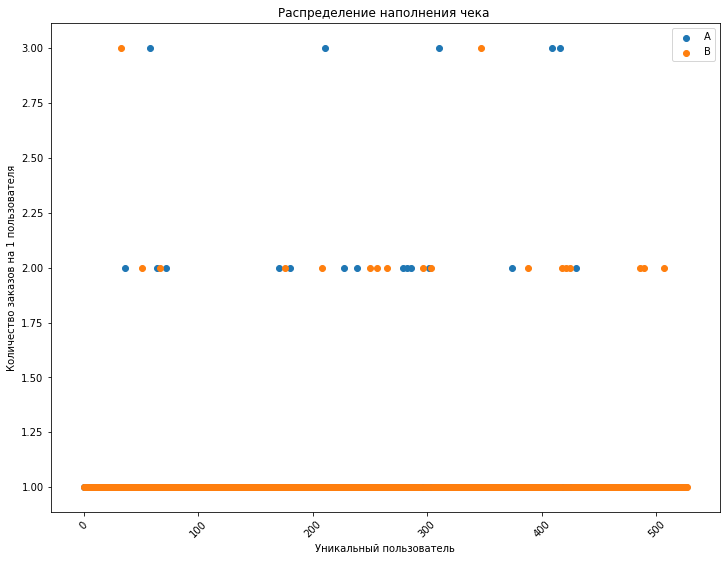

In [26]:
plt.figure(figsize=(12,9))
plt.scatter(list(range(0,len(users_ordersA['transactionId']))),users_ordersA['transactionId'],label='A')
plt.scatter(list(range(0,len(users_ordersB['transactionId']))),users_ordersB['transactionId'],label='B')
plt.xticks(rotation=45)
plt.title('Распределение наполнения чека ')
plt.xlabel('Уникальный пользователь')
plt.ylabel('Количество заказов на 1 пользователя')
plt.legend()

Из диаграммы видно, что в обеих группах в основном 1-2 заказа. Выбросы могут влиять на кумулятивную конверсию, нужно выделить аномальную группу пользователей и исследовать данные.

### Расчет границы аномальных пользователей по количеству заказов

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [27]:
np.percentile(users_ordersA['transactionId'],[90,95,99])

array([1.  , 1.  , 2.56])

In [28]:
np.percentile(users_ordersB['transactionId'],[90,95,99])

array([1., 1., 2.])

In [29]:
np.percentile(users_orders['transactionId'],[90,95,99])

array([1., 1., 2.])

Для группы А в пределах 99% в заказе 1 позиция, и лишь в 1% - 2 и выше. Также и в группе В. Границу аномальных пользователей следует брать 2.

### График распределения стоимости заказов

Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [30]:
orders_revenue = orders.groupby('transactionId').agg({'revenue':'sum', 'group':'max'})
orders_revenue.head()

,revenue,group
transactionId,,
1062393,6420,A
4919758,2350,B
7210578,3739,A
8131427,4710,A
11068804,4790,B


In [31]:
orders_revenueA = orders_revenue[orders_revenue['group']=='A']
orders_revenueB = orders_revenue[orders_revenue['group']=='B']

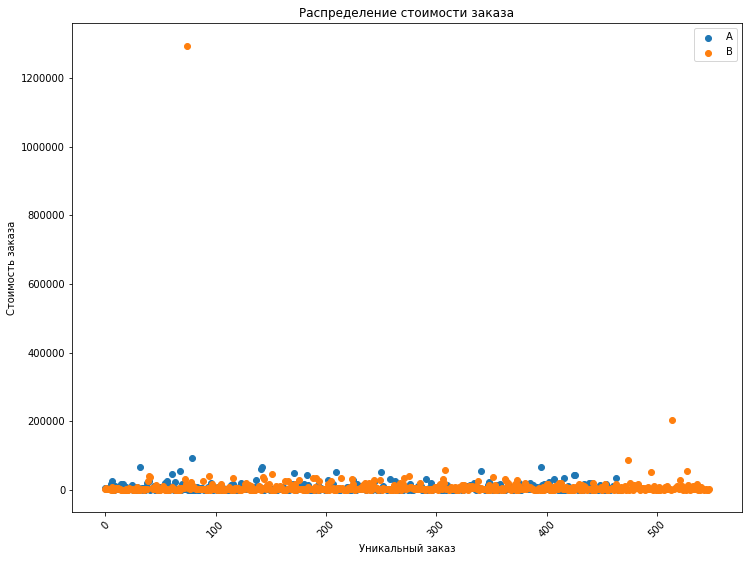

In [32]:
plt.figure(figsize=(12,9))
plt.scatter(list(range(0,len(orders_revenueA['revenue']))),orders_revenueA['revenue'],label='A')
plt.scatter(list(range(0,len(orders_revenueB['revenue']))),orders_revenueB['revenue'],label='B')
plt.xticks(rotation=45)
plt.title('Распределение стоимости заказа')
plt.xlabel('Уникальный заказ')
plt.ylabel('Стоимость заказа')
plt.legend()

Из диаграммы видно, что большая часть заказов по стоимости не превышает 100 тыс. у.е., но есть выбросы, которые могут влиять на показатели кумулятивного среднего чека и кумулятивной выручки. Нужно также выделить аномальную группу пользователей и изучить данные.

### Расчет границы аномальных пользователей по стоимости заказов

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [33]:
np.percentile(orders_revenueA['revenue'],[90,95,99])

array([17990.  , 24944.5 , 56064.18])

In [34]:
np.percentile(orders_revenueB['revenue'],[90,95,99])

array([17990. , 27561.5, 49553.6])

In [35]:
np.percentile(orders_revenue['revenue'],[90,95,99])

array([17990., 26785., 53904.])

Из данных видно, что в группе А 95% заказов стоимость не превышает отметку 26718, а в группе B - 28787 соответственно. Выберем границу 28000.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Границы аномалий выбраны корректно!</div> <br>

### Расчет статистической значимости различий в конверсии по сырым данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения. Сперва рассчитаем куммулятивное количество зашедших по группам.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Посчитаем кумулятивное количество заказов и выручки по группам.

In [37]:
ordersADaily = (
    orders[orders['group'] == 'A'][['transactionId', 'visitorId','date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['transactionId', 'visitorId','date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Объединим получившиеся таблицы.

In [38]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [39]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Соберем данные по количеству заказов в каждой группе по пользователям.

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Соединим полученные данные в сэмплы для анализа статистической значимости.

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Рассчитаем p-value. Возьмем за нулевую гипотезу то, что две последовательности схожи, статистических различий между ними нет. Альтернативная теория - статистические различия в конверсии по группам есть.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
Гипотезы сформулированы верно ✅</div> <br>

In [42]:
stats.mannwhitneyu(sampleA,sampleB, alternative="two-sided")[1]

0.011018084110014691

Посмотрим относительный прирост.

In [43]:
(data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1

0.1597977924896936

P-value меньше 0,05, значит нулевую гипотезу мы отвергаем. По сырым данным можно сказать, что различия в конверсии имеют статистическую значимость и прирост конверсии в группе B составляет 16%

### Расчет статистической значимости различий в среднем чеке по сырым данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения. Рассчитаем p-value. Возьмем за нулевую гипотезу то, что две последовательности схожи, статистических различий между ними нет. Альтернативная теория - статистические различия в среднем чеке по группам есть.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
Гипотезы сформулированы верно ✅</div> <br>

In [44]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]

0.8294908998149533

Посчитаем прирост.

In [45]:
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

0.28660287636871096

P-value значительно выше 0,05, это говорит о том, что по сырым данным статистической значимости различий нет, при этом прирост в группе В +28,7%. Следует проверить по очищенным данным.

### Расчет статистической значимости различий в конверсии по очищенным данным

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения. Сперва выделим группу аномальных пользователей по количеству заказов и сумме заказа.

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Объединим данные с отфильтрованными данными.

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем p-value по очищенным данным.Возьмем за нулевую гипотезу то, что две последовательности схожи, статистических различий между ними нет. Альтернативная теория - статистические различия в конверсии по группам есть.

In [48]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]

0.00945335018662552

Посчитаем прирост по очищенным данным.

In [49]:
sampleBFiltered.mean()/sampleAFiltered.mean()-1

0.18862770012706487

P-value снова ниже 0,05, т.е. статистическая значимость различия в конверсии есть, а прирост по очищенным данным 17,2% в группе В.

### Расчет статистической значимости различий в среднем чеке по очищенным данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения. Возьмем за нулевую гипотезу то, что две последовательности схожи, статистических различий между ними нет. Альтернативная теория - статистические различия в среднем чеке по группам есть.

In [50]:
stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'], alternative="two-sided"
)[1]

0.7616880562749192

In [51]:
(orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )
]['revenue'].mean()
/ orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )
]['revenue'].mean()
- 1
)

-0.022449424512020366

P-value по очищенным данным выше 0,05, т.е. стастистической значимости различий в среднем чеке не наблюдается, отрицательное значение прироста -2% не является значимым. Перейдем к общим выводам, в которых укажем итоговое решение по А/В-тесту.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Проверки выполнены корректно, результаты интерпретированы верно!</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
Попрошу тебя сформулировать гипотезы - <b>нулевую и альтеранативную</b></div><br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Отмечу одну особенность реализации теста Манна-Уитни stats.mannwhitneyu, у него есть параметр alternative, по-умолчанию, он принимает значение None для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не корректно для нашего теста. Для получения правильных результатов нужно использовать alternative="two-sided". В новых версиях библиотеки эта ошибка исправлена, по-умолчанию, установлена проверка двусторонней гипотезы</div> <br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Нулевую и альтернативную гипотезы сформулировал для каждого теста, улучшил тест Манна-Уитни согласно твоим рекомендациям. Спасибо за наставничество! </div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

## Выводы

В ходе исследования была проведена приоритезация гипотез по фреймворкам ICE и RICE. Наиболее приоритетные гипотезы по расчету ICE - это 9, 1 и 8. При этом расчете не учитывается охват. При добавлении охвата в расчет наиболее приоритетной становится гипотеза 8, это говорит о том, что данная гипотеза затронет максимальное количество пользователей, максимально повлияет на пользователей, при этом есть высокая уверенность в гипотезе и умеренные затраты на ее осуществление.

В ходе анализа А/В-теста были сделаны следующие выводы:
1. Из графика кумулятивной выручки увидели, что сперва выручки растут примерно одинаково, но в определенный момент в группе В наблюдается резкий скачок вверх, а затем снова параллельный рост. Это сигнализирует скорее всего о выбросе, что может исказить данные.
2. Из графика кумулятивного среднего чека увидели, что была большая покупка, которая резко увеличила средний чек группы B. Ближе к концу теста происходит меньше колебаний, график выравнивается.
3. Из графика относительного изменения кумулятивного среднего чека увидели, что есть скачок группы А, из-за чего прирост уходит в отрицательное значение, но в большей части теста присрост среднего чека в положительной динамике. Для понимания, в какой группе выброс - проанализировали кумулятивную конверсию.
4. Из графика кумулятивной конверсии увидели, что сперва конверсия стабилизируется, далее - конверсия группы В (около 3%) стабильно выше группы А (около 2,5%).
5. Из графика относительного изменения кумулятивной конверсии увидели, что сперва данные стабилизируются, далее фиксируется прирост вокруг значения +15%. Это говорит, что конверсия в групее B выше, чем в групее А на 15%, что дало первый сигнал о успешности гипотезы в части повышения импульса к покупке.
6. Из диаграммы с рассеивания по количеству заказов на пользователей увидели, что в обеих группах один пользователь совершает 1-2 заказа. Выбросы повлияли на кумулятивную конверсию. Для группы А в пределах 99% в заказе 1 позиция, и лишь в 1% - 2 и выше. Границу аномальных пользователей взяли 2 заказа.
7. Из диаграммы рассеивания по стоимости заказов увидели, что большая часть заказов по стоимости не превышает 100 тыс. у.е., но есть выбросы, которые повлияли на показатели кумулятивного среднего чека и кумулятивной выручки. Из данных увидели, что в группе А 95% заказов стоимость не превышает отметку 26718, а в группе B - 27787 соответственно. Выбрали границу 28000.
8. При рассчете стастичиской значимости различий в конверсии по сырым данным выяснили, что P-value меньше 0,05, значит нулевую гипотезу мы отвергаем. По сырым данным можно сказать, что различия в конверсии имеют статистическую значимость и прирост конверсии в группе B составляет 16%. По очищенным данным укрепили уверенность в данных: P-value снова ниже 0,05, т.е. статистическая значимость различия в конверсии есть, а прирост по очищенным данным 18,9% в группе В.
9. При рассчете стастичиской значимости различий в среднем чеке по сырым данным выяснили, что P-value значительно выше 0,05, это говорит о том, что по сырым данным статистической значимости различий нет, при этом прирост в группе В +25,8%. Следует проверить по очищенным данным. По очищенным данным укрепились в том, что P-value по очищенным данным выше 0,05, т.е. стастистической значимости различий в среднем чеке не наблюдается, отрицательное значение прироста -2% не является значимым, а прирост +25% обеспечили единичные заказы с аномально высокой стоимостью.
10. По итогу анализа A/B-теста следует остановить тест и признать победу группы B, т.к. она показала прирост в конверсии на 18,9%, при этом средний чек не изменился, но столь высокое повышение конверсии значительно увеличит товарооборот при равном среднем чеке. Т.е. товарооборот прирастет с аналогичного трафика на 18,9%

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Сергей, проект выполнен очень хорошо, ты отлично справился с проверкой результатов АВ теста, но всё же есть места для доработки:
- провести небольшой обзор данных и проверить корректность
- сформлуировать гипотезы


**Решение по тесту**

Согласен с решением по тесту, ты привел убедительные доводы👌


Исправляй и отправляй на проверку🛠